<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(0_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_0.4_n20.csv',
 'data_add_delta_0.4_n30.csv',
 'data_add_delta_0.4_n60.csv',
 'data_add_delta_0.4_n120.csv',
 'data_add_delta_0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.159503,84.041515,28.243779,37.479897,0.299347,205.224041,204.667966,0.556076
1,0.0,1.0,71.746582,23.412244,56.159668,81.021234,1.678050,244.017778,242.896246,1.121532
2,0.0,2.0,72.835067,42.026817,33.351798,74.968003,5.745763,238.927449,234.259822,4.667627
3,0.0,3.0,41.477889,94.558543,24.690261,41.622768,-1.236082,211.113379,212.054426,-0.941047
4,0.0,4.0,25.688058,24.733032,28.293732,35.216784,-2.580999,121.350608,122.971930,-1.621322
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.272661,60.749055,89.787997,74.930861,-1.087972,257.652602,258.860428,-1.207826
19996,999.0,16.0,60.165518,29.912703,48.730358,25.499260,0.459747,174.767586,174.253711,0.513875
19997,999.0,17.0,91.537818,31.480605,72.025308,41.629727,-2.475440,244.198018,246.091190,-1.893172
19998,999.0,18.0,49.543834,31.063851,36.273478,44.814574,-2.001455,169.694282,172.042148,-2.347866


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.159503,84.041515,28.243779,37.479897,0.299347,205.224041,204.667966,0.556076
1,0.0,1.0,71.746582,23.412244,56.159668,81.021234,1.678050,244.017778,242.896246,1.121532
2,0.0,2.0,72.835067,42.026817,33.351798,74.968003,5.745763,238.927449,234.259822,4.667627
3,0.0,3.0,41.477889,94.558543,24.690261,41.622768,-1.236082,211.113379,212.054426,-0.941047
4,0.0,4.0,25.688058,24.733032,28.293732,35.216784,-2.580999,121.350608,122.971930,-1.621322
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.272661,60.749055,89.787997,74.930861,-1.087972,257.652602,258.860428,-1.207826
19996,999.0,16.0,60.165518,29.912703,48.730358,25.499260,0.459747,174.767586,174.253711,0.513875
19997,999.0,17.0,91.537818,31.480605,72.025308,41.629727,-2.475440,244.198018,246.091190,-1.893172
19998,999.0,18.0,49.543834,31.063851,36.273478,44.814574,-2.001455,169.694282,172.042148,-2.347866


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    45.159503  84.041515  28.243779  37.479897  0.299347  205.224041   
      1.0    71.746582  23.412244  56.159668  81.021234  1.678050  244.017778   
      2.0    72.835067  42.026817  33.351798  74.968003  5.745763  238.927449   
      3.0    41.477889  94.558543  24.690261  41.622768 -1.236082  211.113379   
      4.0    25.688058  24.733032  28.293732  35.216784 -2.580999  121.350608   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.272661  60.749055  89.787997  74.930861 -1.087972  257.652602   
      16.0   60.165518  29.912703  48.730358  25.499260  0.459747  174.767586   
      17.0   91.537818  31.480605  72.025308  41.629727 -2.475440  244.198018   
      18.0   49.543834  31.063851  36.273478  44.814574 -2.001455  169.694282   
      19.0   89.242547  67.732547  80.156220  26.759038 -2.142246  271.748107   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    204.667966  0.556076  
      1.0    242.896246  1.121532  
      2.0    234.259822  4.667627  
      3.0    212.054426 -0.941047  
      4.0    122.971930 -1.621322  
...                 ...       ...  
999.0 15.0   258.860428 -1.207826  
      16.0   174.253711  0.513875  
      17.0   246.091190 -1.893172  
      18.0   172.042148 -2.347866  
      19.0   272.096987 -0.348881  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    45.159503  84.041515  28.243779  37.479897  0.299347  205.224041   
      1.0    71.746582  23.412244  56.159668  81.021234  1.678050  244.017778   
      2.0    72.835067  42.026817  33.351798  74.968003  5.745763  238.927449   
      3.0    41.477889  94.558543  24.690261  41.622768 -1.236082  211.113379   
      4.0    25.688058  24.733032  28.293732  35.216784 -2.580999  121.350608   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.272661  60.749055  89.787997  74.930861 -1.087972  257.652602   
      16.0   60.165518  29.912703  48.730358  25.499260  0.459747  174.767586   
      17.0   91.537818  31.480605  72.025308  41.629727 -2.475440  244.198018   
      18.0   49.543834  31.063851  36.273478  44.814574 -2.001455  169.694282   
      19.0   89.242547  67.732547  80.156220  26.759038 -2.142246  271.748107   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    204.667966  0.556076  
      1.0    242.896246  1.121532  
      2.0    234.259822  4.667627  
      3.0    212.054426 -0.941047  
      4.0    122.971930 -1.621322  
...                 ...       ...  
999.0 15.0   258.860428 -1.207826  
      16.0   174.253711  0.513875  
      17.0   246.091190 -1.893172  
      18.0   172.042148 -2.347866  
      19.0   272.096987 -0.348881  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.159503,84.041515,28.243779,37.479897,0.299347,205.224041,204.667966,0.556076
1,0.0,1.0,71.746582,23.412244,56.159668,81.021234,1.678050,244.017778,242.896246,1.121532
2,0.0,2.0,72.835067,42.026817,33.351798,74.968003,5.745763,238.927449,234.259822,4.667627
3,0.0,3.0,41.477889,94.558543,24.690261,41.622768,-1.236082,211.113379,212.054426,-0.941047
4,0.0,4.0,25.688058,24.733032,28.293732,35.216784,-2.580999,121.350608,122.971930,-1.621322
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.272661,60.749055,89.787997,74.930861,-1.087972,257.652602,258.860428,-1.207826
19996,999.0,16.0,60.165518,29.912703,48.730358,25.499260,0.459747,174.767586,174.253711,0.513875
19997,999.0,17.0,91.537818,31.480605,72.025308,41.629727,-2.475440,244.198018,246.091190,-1.893172
19998,999.0,18.0,49.543834,31.063851,36.273478,44.814574,-2.001455,169.694282,172.042148,-2.347866


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    45.159503  84.041515  28.243779  37.479897  0.299347  205.224041   
      1.0    71.746582  23.412244  56.159668  81.021234  1.678050  244.017778   
      2.0    72.835067  42.026817  33.351798  74.968003  5.745763  238.927449   
      3.0    41.477889  94.558543  24.690261  41.622768 -1.236082  211.113379   
      4.0    25.688058  24.733032  28.293732  35.216784 -2.580999  121.350608   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.272661  60.749055  89.787997  74.930861 -1.087972  257.652602   
      16.0   60.165518  29.912703  48.730358  25.499260  0.459747  174.767586   
      17.0   91.537818  31.480605  72.025308  41.629727 -2.475440  244.198018   
      18.0   49.543834  31.063851  36.273478  44.814574 -2.001455  169.694282   
      19.0   89.242547  67.732547  80.156220  26.759038 -2.142246  271.748107   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    204.667966  0.556076  
      1.0    242.896246  1.121532  
      2.0    234.259822  4.667627  
      3.0    212.054426 -0.941047  
      4.0    122.971930 -1.621322  
...                 ...       ...  
999.0 15.0   258.860428 -1.207826  
      16.0   174.253711  0.513875  
      17.0   246.091190 -1.893172  
      18.0   172.042148 -2.347866  
      19.0   272.096987 -0.348881  

[20000 rows x 8 columns]

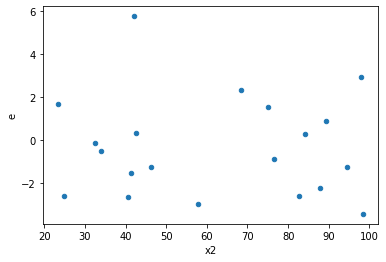

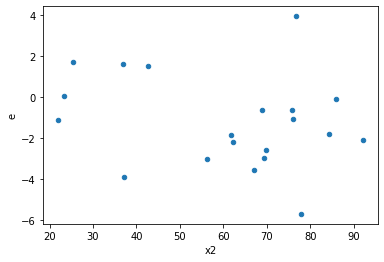

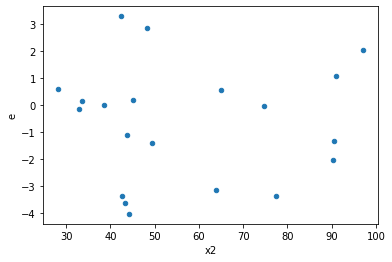

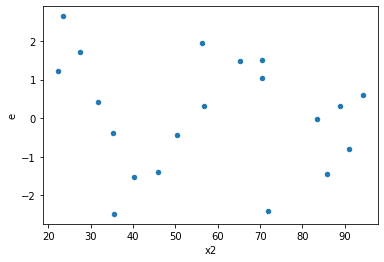

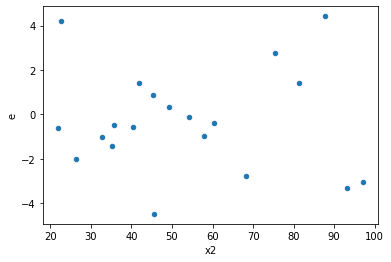

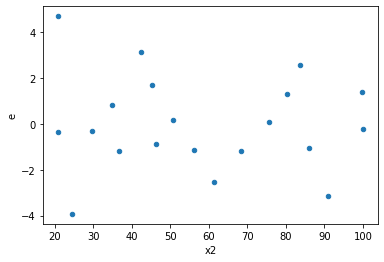

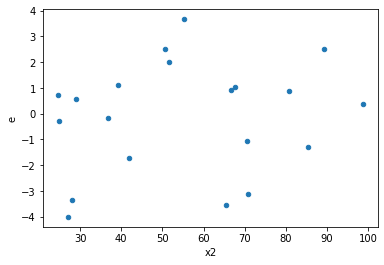

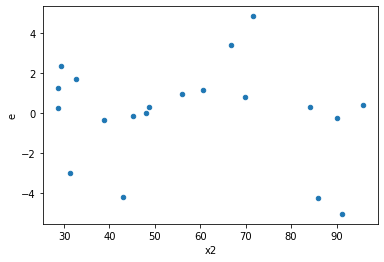

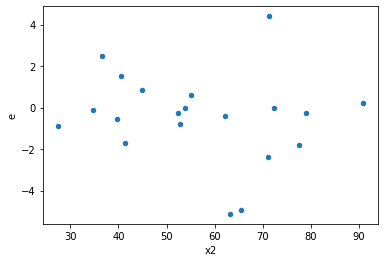

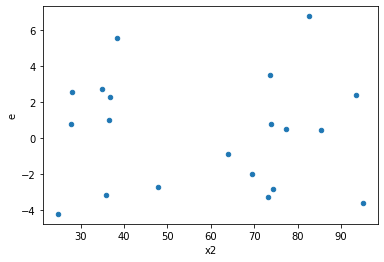

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,4.0,4.0,10.837810831665449,29.982203862231778,2.709452707916362,7.495550965557944,2.766444656390483,0.3480864113134867,0.8259567943432566,0.17404320565674336,Reject005=1 : Homoscedasticity
7.0,4.0,4.0,1.4519901205498644,17.768412793121314,0.3629975301374661,4.4421031982803285,12.237282156157143,0.032517063161096926,0.9837414684194515,0.016258531580548463,Reject005=0 : Heteroscedasticity
8.0,4.0,4.0,4.778630481337144,45.394423895766394,1.194657620334286,11.348605973941599,9.4994630936737,0.050971454227522583,0.9745142728862387,0.025485727113761292,Reject005=1 : Homoscedasticity
9.0,4.0,4.0,9.830903777331338,30.426937581260667,2.4577259443328345,7.606734395315167,3.0950295385273576,0.29954833998784514,0.8502258300060774,0.14977416999392257,Reject005=1 : Homoscedasticity
12.0,4.0,4.0,4.676795888503589,12.18843143688459,1.1691989721258973,3.0471078592211476,2.6061499640910055,0.3760892307470485,0.8119553846264758,0.18804461537352424,Reject005=1 : Homoscedasticity
13.0,4.0,4.0,10.967872605845315,17.568743908410543,2.7419681514613288,4.392185977102636,1.601836977851776,0.6592197313727131,0.6703901343136435,0.32960986568635653,Reject005=1 : Homoscedasticity
16.0,4.0,4.0,6.831508991716308,15.6244557750843,1.707877247929077,3.906113943771075,2.287116330232467,0.44267179367152365,0.7786641031642382,0.22133589683576183,Reject005=1 : Homoscedasticity
18.0,4.0,4.0,2.0536660809809257,12.537135299827977,0.5134165202452314,3.134283824956994,6.104758420044441,0.10771110120661698,0.9461444493966915,0.05385555060330849,Reject005=1 : Homoscedasticity
19.0,4.0,4.0,3.028482565708445,5.052936325805507,0.7571206414271112,1.2632340814513767,1.6684713271986384,0.6320993219090103,0.6839503390454948,0.31604966095450515,Reject005=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,20.222903117413402,14.910080598249275,5.0557257793533505,3.7275201495623187,0.7372868530142244,0.7748984800672531,Reject005=1 : Homoscedasticity
1.0,4.0,4.0,10.837810831665449,29.982203862231778,2.709452707916362,7.495550965557944,2.766444656390483,0.3480864113134867,Reject005=1 : Homoscedasticity
2.0,4.0,4.0,24.342998354052586,8.458118617273216,6.0857495885131465,2.114529654318304,0.34745590885130717,0.33036997833857856,Reject005=1 : Homoscedasticity
3.0,4.0,4.0,3.1294073438578036,3.0088350126686345,0.7823518359644509,0.7522087531671586,0.9614711931235732,0.9705395737955553,Reject005=1 : Homoscedasticity
4.0,4.0,4.0,14.648115480417719,12.595511170411358,3.6620288701044297,3.1488777926028395,0.8598724653181239,0.8872000156096048,Reject005=1 : Homoscedasticity
5.0,4.0,4.0,26.956757729763787,5.929531310879173,6.739189432440947,1.4823828277197932,0.2199645584354603,0.17161089942564128,Reject005=1 : Homoscedasticity
6.0,4.0,4.0,10.100520386934901,5.26446285467731,2.5251300967337253,1.3161157136693276,0.5212070916154906,0.5434719973222377,Reject005=1 : Homoscedasticity
7.0,4.0,4.0,1.4519901205498644,17.768412793121314,0.3629975301374661,4.4421031982803285,12.237282156157143,0.032517063161096926,Reject005=0 : Heteroscedasticity
8.0,4.0,4.0,4.778630481337144,45.394423895766394,1.194657620334286,11.348605973941599,9.4994630936737,0.050971454227522583,Reject005=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      916
Reject005=0 : Heteroscedasticity     84
Name: Result_test, dtype: int64